# Gráfica con el perfil original y el interpolado

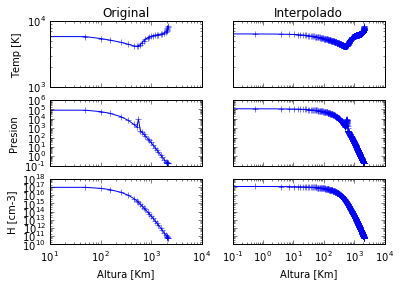

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sp
import matplotlib.pyplot as plt
from matplotlib.widgets import MultiCursor

#Parametros iniciales
#ide,z,T,P,H,V,vt=np.loadtxt("../data/C07/hydrostatic.bak",unpack=True)
ide,z,T,P,H,V,vt=np.loadtxt("../data/VALC/hydrostatic.bak",unpack=True)

density=20
capa_lim=33
zc7=z[:capa_lim]
Tc7=T[:capa_lim]
Pc7=P[:capa_lim]
Hc7=H[:capa_lim]
Vc7=V[:capa_lim]
vtc7=vt[:capa_lim]

#Interpol
xnew = np.linspace(np.min(zc7), np.max(zc7), len(zc7)*density)
fl_1 = sp.interp1d(zc7, Tc7, kind='linear')
fl_2 = sp.interp1d(zc7, Pc7, kind='linear')
fl_3 = sp.interp1d(zc7, Hc7, kind='linear')

#Plot
fig = plt.figure()

#321
ax1 = fig.add_subplot(321)
plt.title("Original")
plt.plot(zc7, Tc7,'+-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Temp [K]")
plt.setp(ax1.get_xticklabels(), visible=False)

#322
ax2 = fig.add_subplot(322, sharey=ax1)
plt.title("Interpolado")
ax2.plot(xnew, fl_1(xnew),'+-')
plt.xscale('log')
plt.yscale('log')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

#323
ax3 = fig.add_subplot(323)
plt.plot(zc7, Pc7,'+-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Presion")
plt.setp(ax3.get_xticklabels(), visible=False)

#324
ax4 =fig.add_subplot(324, sharey=ax3)
ax4.plot(xnew, fl_2(xnew),'+-')
plt.xscale('log')
plt.yscale('log')
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

#325
ax5 = fig.add_subplot(325)
plt.plot(zc7, Hc7,'+-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("H [cm-3]")
plt.xlabel("Altura [Km]")

#326
ax6 = fig.add_subplot(326, sharey=ax5)
ax6.plot(xnew, fl_3(xnew),'+-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Altura [Km]")
plt.setp(ax6.get_yticklabels(), visible=False)


multi = MultiCursor(fig.canvas, (ax1, ax3, ax5,ax2, ax4, ax6), color='g', lw=1)
plt.show()

# Rutina para grabar los datos de interpolación en un archivo

In [ ]:
import scipy.interpolate as sp

#ide,z,T,P,H,V,vt=np.loadtxt("../data/C07/hydrostatic.bak",unpack=True)
ide,z,T,P,H,V,vt=np.loadtxt("../data/VALC/hydrostatic.bak",unpack=True)

density=5
capa_lim=33

zc7=z[:capa_lim]
Tc7=T[:capa_lim]
Pc7=P[:capa_lim]
Hc7=H[:capa_lim]
Vc7=V[:capa_lim]
vtc7=vt[:capa_lim]

xnew = np.linspace(np.min(zc7), np.max(zc7), len(zc7)*density)
fl_1 = sp.interp1d(zc7, Tc7, kind='linear')
fl_2 = sp.interp1d(zc7, Pc7, kind='linear')
fl_3 = sp.interp1d(zc7, Hc7, kind='linear')
fl_4 = sp.interp1d(zc7, Vc7, kind='linear')
fl_5 = sp.interp1d(zc7, vtc7, kind='linear')

zc7_new=xnew
Tc7_new=fl_1(xnew)
Pc7_new=fl_2(xnew)
Hc7_new=fl_3(xnew)
Vc7_new=fl_4(xnew)
vtc7_new=fl_5(xnew)

#f = open('../data/C07_interpol/hydrostatic_1.bak','w')
f = open('../data/VALC_interpol/hydrostatic.bak','w')

f.write('# H\n')
f.write('# Header file to hidrostatic model\n')
f.write('# By: Francisco Tapia\n')
f.write('# ftapia.va@gmail.com\n')
f.write('# 12/24/2016\n')
f.write('# Dummy Pakage to prove te read data\n')
f.write('# id: Identification model\n')
f.write('# z : Height over the photosphere (km)\n')
f.write('# T : Temperature (k)\n')
f.write('# P : Presure\n')
f.write('# H : Hidrogen density (cm-3)\n')
f.write('# [ne]: Calculada a partir de las especies\n')
f.write('# V : Doppler Velocity\n')
f.write('# vt: Turbulent Velocity\n')
f.write('#id\tz\t\tT\t\tP\t\tH\t\tV\t\tvt\n')
    
for i in range(0,len(Tc7_new)):
    f.write('%d'%(i+1)+'\t'+'{:.3e}'.format(float(zc7_new[i]))+'\t'+'{:.3e}'.format(float(Tc7_new[i]))
            +'\t'+'{:.3e}'.format(float(Pc7_new[i]))+'\t'+'{:.3e}'.format(float(Hc7_new[i]))
            +'\t'+'{:.3e}'.format(float(Vc7_new[i]))+'\t'+'{:.3e}'.format(float(vtc7_new[i]))+'\n')

for i in range(capa_lim,len(z)):
    f.write('%d'%((i-(capa_lim-1))+len(zc7_new))+'\t'+'{:.3e}'.format(float(z[i]))+'\t'+'{:.3e}'.format(float(T[i]))
            +'\t'+'{:.3e}'.format(float(P[i]))+'\t'+'{:.3e}'.format(float(H[i]))
            +'\t'+'{:.3e}'.format(float(V[i]))+'\t'+'{:.3e}'.format(float(vt[i]))+'\n')    
    
f.close()

# Acotamiento del perfil

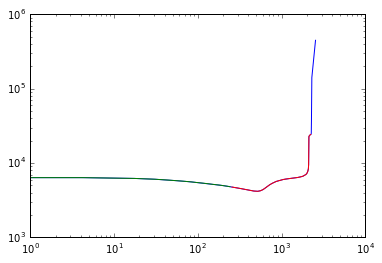

In [21]:
import matplotlib.pyplot as plt
import numpy as np


ide,z,T,P,H,V,vt=np.loadtxt("../data/VALC_interpol/hydrostatic.bak",unpack=True)

plt.plot(z,T)
plt.plot(z[:25],T[:25])
plt.plot(z[25:175],T[25:175])
plt.xscale('log')
plt.yscale('log')

plt.savefig("inter.png", dpi=400)
plt.show()
